## Grid

variables: k, M, epsilon

can also see how well grid approximates the data for different values of M? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from grid import create_grid_synopsis
from lloyd import lloyd_with_weights
from evaluation_utils import kmeans_loss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

master_rng = np.random.default_rng(42)

# one function to apply grid synopsis and then non-private kmeans
def cluster_grid(data: np.ndarray, k: int, e:float, M:int, seed:int) -> np.ndarray:

    grid_synopsis = create_grid_synopsis(data, e, data.shape[1], M, seed)

    centers = KMeans(n_clusters=k).fit(grid_synopsis[:,:-1], sample_weight=grid_synopsis[:,-1]).cluster_centers_

    return centers

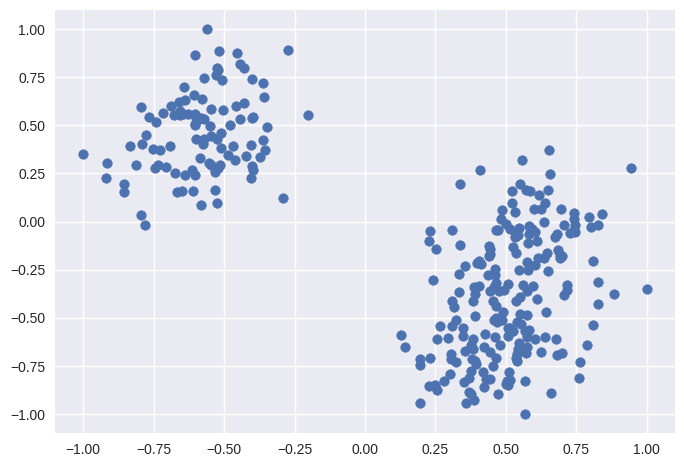

In [2]:
plt.style.use('seaborn-v0_8') 
small = np.load("datasets/synthetic-gaussian.npy")

plt.scatter(x=small[:,0], y=small[:,1])

30


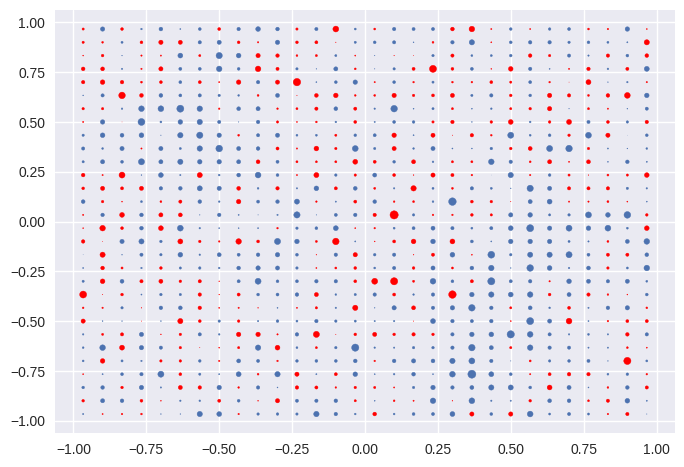

In [4]:
import pandas as pd

grid_synopsis = create_grid_synopsis(small, 1, 2, seed=1837241)

positive_weights = grid_synopsis[grid_synopsis[:, 2] >= 0]
negative_weights = grid_synopsis[grid_synopsis[:, 2] < 0]

plt.scatter(x=positive_weights[:,0], y=positive_weights[:,1], s=5*positive_weights[:,2])
plt.scatter(x=negative_weights[:,0], y=negative_weights[:,1], s=5*abs(negative_weights[:,2]), c='red')

plt.show()

[[ 0.07955347 -0.78439666]
 [ 0.60781834 -0.24028606]
 [-0.49287309  0.37209383]]


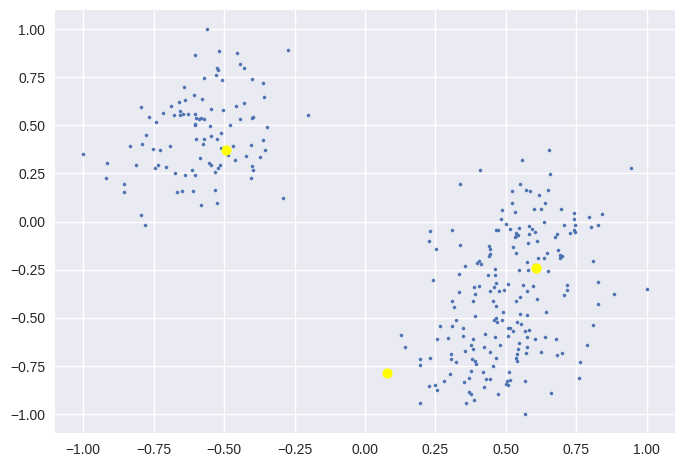

In [8]:
centers = lloyd_with_weights(k=3, X=pd.DataFrame(grid_synopsis[:,:-1]), weights=pd.Series(grid_synopsis[:,-1]), n_iter=10, rs=25332).to_numpy()
print(centers)
plt.scatter(x=small[:,0], y=small[:,1], s=5)
plt.scatter(x=centers[:,0], y=centers[:,1], c="yellow")